Dataset shape: (254, 20)
Dataset columns: Index(['Team', 'Opponent', 'Format', 'Ground', 'Year', 'Toss', 'Selection',
       'Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
       'Highest Individual wicket', 'Player Of The Match', 'Result'],
      dtype='object')
Missing values:
 Team                         0
Opponent                     0
Format                       0
Ground                       0
Year                         0
Toss                         0
Selection                    0
Run Scored                   2
Wicket Lost                  2
Fours                        2
Sixes                        2
Extras                       2
Run Rate                     2
Avg Bat Strike Rate          2
Highest Score                2
Wicket Taken                 2
Given Extras                 2
Highest Individual wicket    2
Player Of The Match          2
Result                       

c:\Users\vidya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


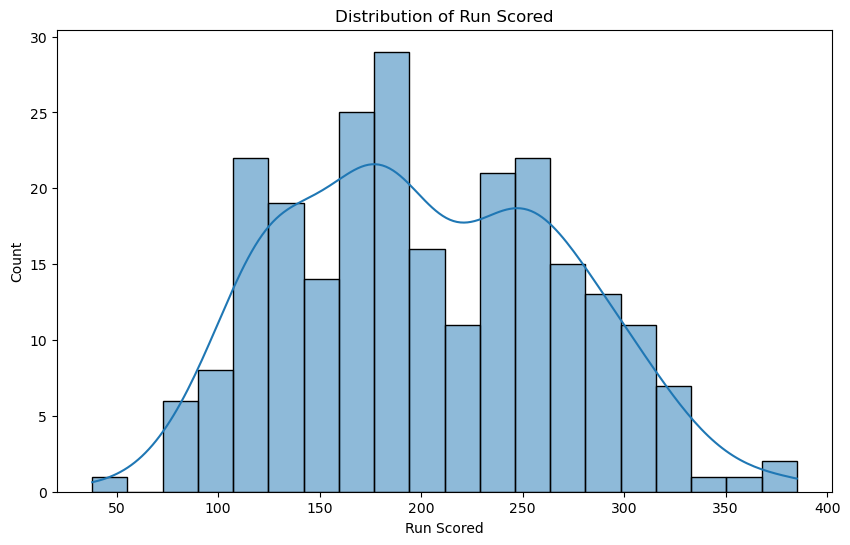

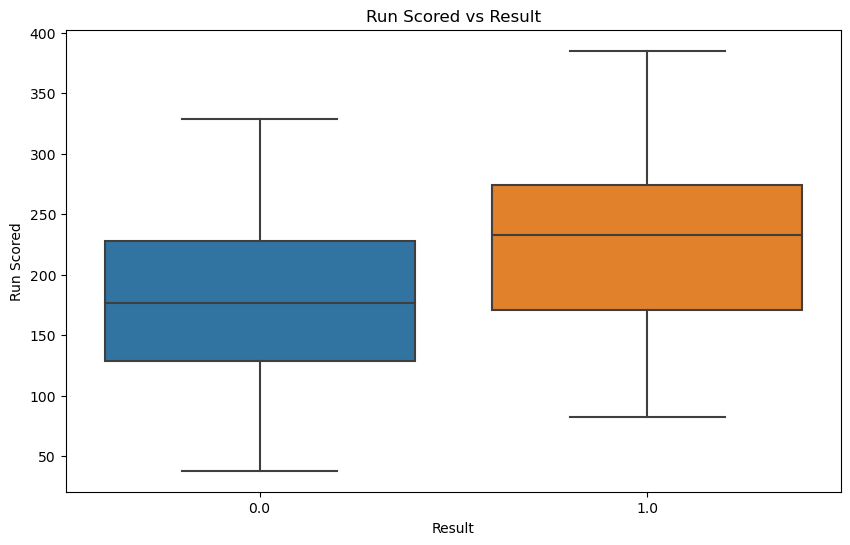

Accuracy: 0.7755102040816326
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74        22
         1.0       0.79      0.81      0.80        27

    accuracy                           0.78        49
   macro avg       0.77      0.77      0.77        49
weighted avg       0.78      0.78      0.77        49

Confusion Matrix:
 [[16  6]
 [ 5 22]]


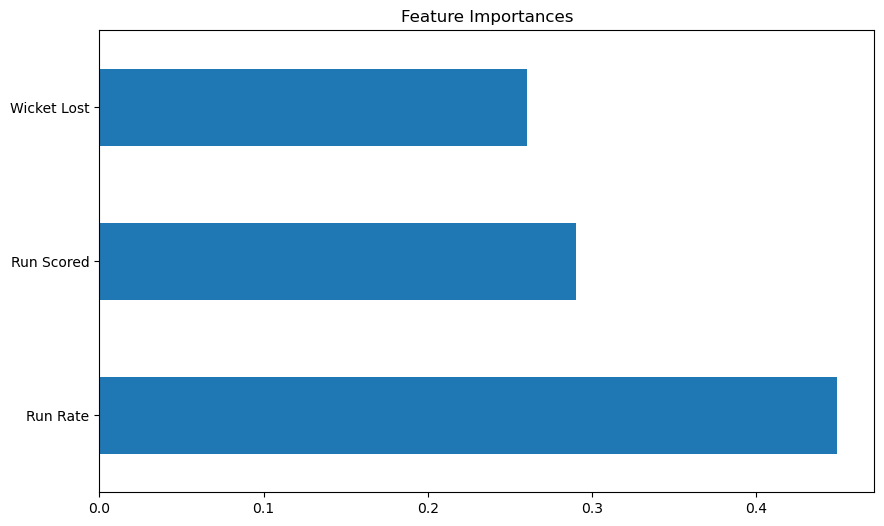

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = '..\\data\\raw\\asiacup.csv'
df = pd.read_csv(file_path)

# Data Exploration
print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

# Handle missing values (example: fill with mean or median)
df['Run Scored'] = df['Run Scored'].fillna(df['Run Scored'].median())
df['Wicket Lost'] = df['Wicket Lost'].fillna(df['Wicket Lost'].median())

# Convert categorical columns to numerical (example: using label encoding or one-hot encoding)
df['Result'] = df['Result'].map({'Win': 1, 'Lose': 0})

# Feature Engineering (example: creating new features or modifying existing ones)
# Avoid division by zero and handle infinite values
df['Wicket Lost'] = df['Wicket Lost'].replace(0, np.nan)
df['Run Rate'] = df['Run Scored'] / df['Wicket Lost']
df['Run Rate'] = df['Run Rate'].replace([np.inf, -np.inf], np.nan)
df['Run Rate'] = df['Run Rate'].fillna(df['Run Rate'].median())

# Check for any remaining infinite or large values
print("Check for infinite values:\n", df.isin([np.inf, -np.inf]).sum())

# Remove rows with NaN values if any
df = df.dropna()

# Exploratory Data Analysis (EDA)
# Plot distributions of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df['Run Scored'], bins=20, kde=True)
plt.title('Distribution of Run Scored')
plt.show()

# Plot relationship between features and target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='Run Scored', data=df)
plt.title('Run Scored vs Result')
plt.show()

# Modeling
# Define features and target variable
X = df[['Run Scored', 'Wicket Lost', 'Run Rate']]
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()
